In [1]:
#ipynb config
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import cv2
import os

plt.style.use('ggplot')

%matplotlib inline

In [3]:
def draw_gray(im):
    plt.imshow(im, cmap=plt.cm.gray, interpolation='none')
    plt.grid(False)
    plt.axis('off')
    plt.colorbar()
    plt.show()

# Lets start with test images

## Converting to grayscale

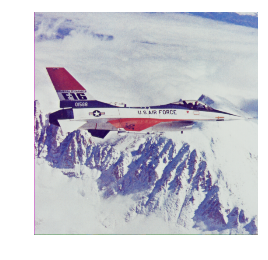

shape is: (512, 512, 3)


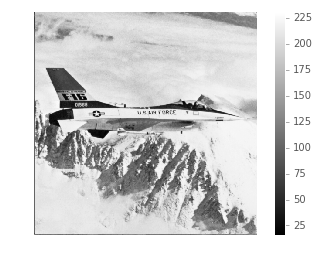

shape is: (512, 512)


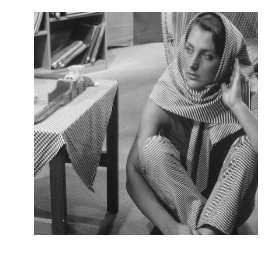

shape is: (512, 512, 3)


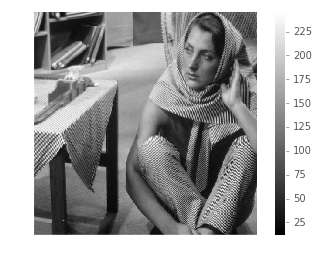

shape is: (512, 512)


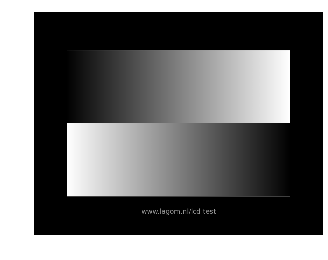

shape is: (768, 990, 3)


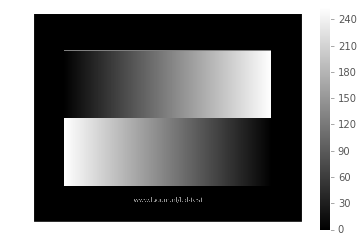

shape is: (768, 990)


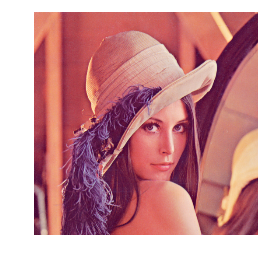

shape is: (512, 512, 3)


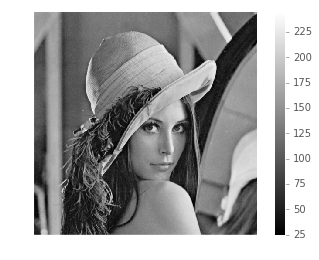

shape is: (512, 512)


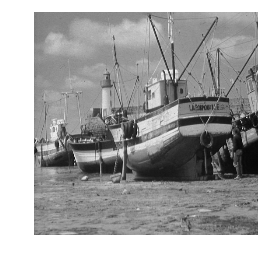

shape is: (512, 512, 3)


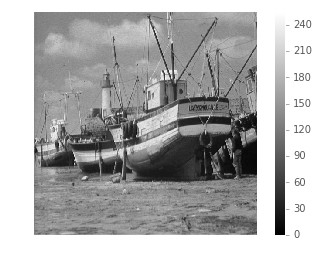

shape is: (512, 512)


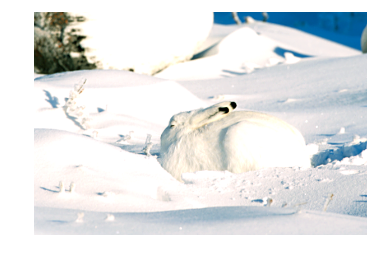

shape is: (400, 594, 3)


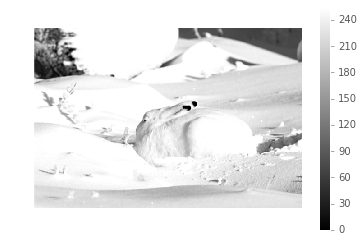

shape is: (400, 594)


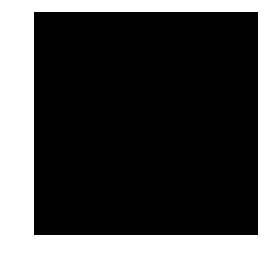

shape is: (512, 512, 3)


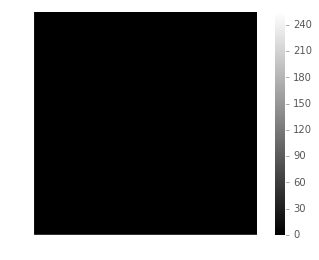

shape is: (512, 512)


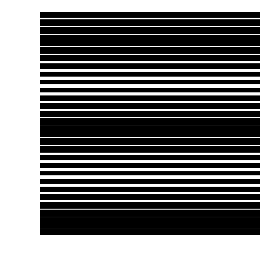

shape is: (1600, 1564, 3)


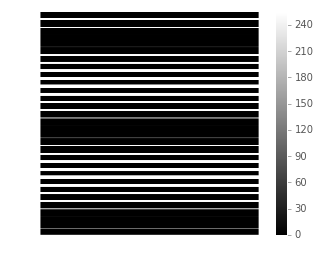

shape is: (1600, 1564)


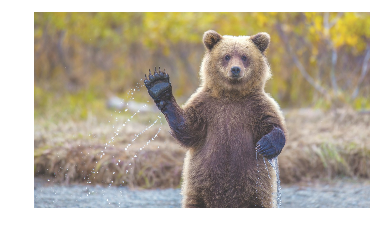

shape is: (824, 1409, 3)


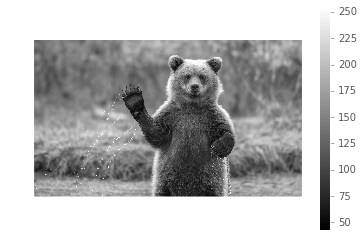

shape is: (824, 1409)


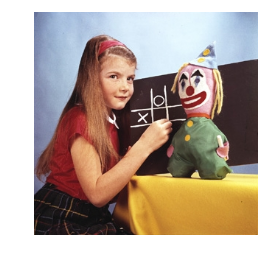

shape is: (304, 304, 3)


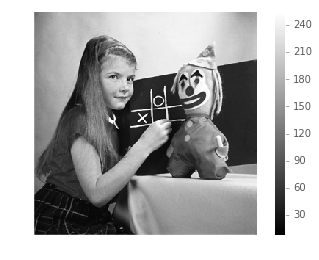

shape is: (304, 304)


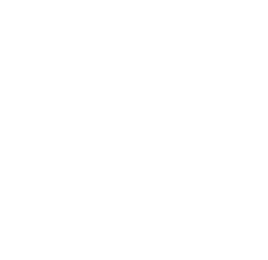

shape is: (512, 512, 3)


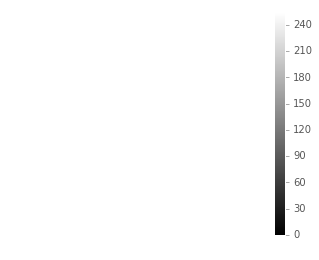

shape is: (512, 512)


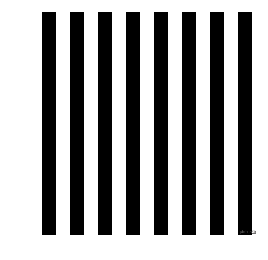

shape is: (512, 512, 3)


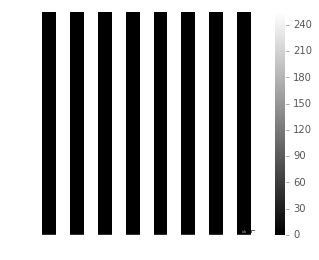

shape is: (512, 512)


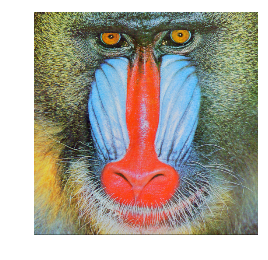

shape is: (512, 512, 3)


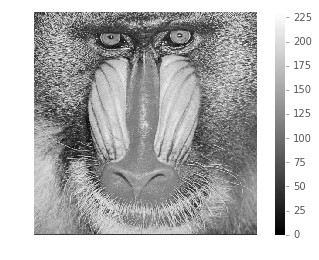

shape is: (512, 512)


In [4]:
input_dir = '../input_imgs/'
gray_scale_input = []

for img_file in os.listdir(input_dir):
    im = cv2.imread(os.path.join('../input_imgs/', img_file))
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.grid(False)
    plt.axis('off')
    plt.show()
    
    print('shape is: {}'.format(im.shape))
    
    gray_im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    
    draw_gray(gray_im)
    
    print('shape is: {}'.format(gray_im.shape))
    
    gray_scale_input.append(gray_im)

# 1. Binary thresholding

In [ ]:
for i, im in enumerate(gray_scale_input):
    thresholded_im = im.copy()
    thresholded_im[thresholded_im <= 0.5 * 255] = 0
    thresholded_im[thresholded_im > 0.5 * 255] = 255
        
    draw_gray(im)
    draw_gray(thresholded_im)
    
    cv2.imwrite('../output_imgs/binary_threshold{}.png'.format(i), thresholded_im)

# 2. Случайный дизеринг

In [ ]:
for i, im in enumerate(gray_scale_input):
    thresholded_im = im.copy()
           
    threshold = np.random.random(size=np.prod(thresholded_im.shape)).reshape(thresholded_im.shape)
    thresholded_im[thresholded_im <= threshold * 255] = 0
    thresholded_im[thresholded_im > threshold * 255]  = 255
        
    draw_gray(im)
    draw_gray(thresholded_im)
    cv2.imwrite('../output_imgs/random_dithering{}.png'.format(i), thresholded_im)

# 3. Упорядоченный дизеринг

## random threshold matrix of different_shape

In [ ]:
for k in [3, 10]:
    threshold = np.random.random(size=k**2).reshape((k, k))
    print('Table shape is: {}'.format(threshold.shape))
    
    for q, im in enumerate(gray_scale_input):
        thresholded_im = im.copy()

        for i in range(thresholded_im.shape[0]):
            for j in range(thresholded_im.shape[1]):
                if thresholded_im[i, j] < threshold[i%threshold.shape[0], j%threshold.shape[1]] * 255:
                    thresholded_im[i, j] = 0
                else:
                    thresholded_im[i, j] = 255

        draw_gray(im)
        draw_gray(thresholded_im)
        
        cv2.imwrite('../output_imgs/ordered_random_matrix_dithering{}.png'.format(q), thresholded_im)

## using Bayer matrix

In [ ]:
threshold = np.array([[1, 3],
                      [4, 2]]) / 5.0

print('Table shape is: {}'.format(threshold.shape))

for q, im in enumerate(gray_scale_input):
    thresholded_im = im.copy()

    for i in range(thresholded_im.shape[0]):
        for j in range(thresholded_im.shape[1]):
            if thresholded_im[i, j] < threshold[i%threshold.shape[0], j%threshold.shape[1]] * 255:
                thresholded_im[i, j] = 0
            else:
                thresholded_im[i, j] = 255

    draw_gray(im)
    draw_gray(thresholded_im)
    
    cv2.imwrite('../output_imgs/ordered_dithering_{}_{}.png'.format(threshold.shape, q), thresholded_im)

In [ ]:
threshold = np.array([[1, 8, 4],
                      [7, 6, 3],
                      [5, 2, 9]]) / 10.0

print('Table shape is: {}'.format(threshold.shape))

for q, im in enumerate(gray_scale_input):
    thresholded_im = im.copy()

    for i in range(thresholded_im.shape[0]):
        for j in range(thresholded_im.shape[1]):
            if thresholded_im[i, j] < threshold[i%threshold.shape[0], j%threshold.shape[1]] * 255:
                thresholded_im[i, j] = 0
            else:
                thresholded_im[i, j] = 255

    draw_gray(im)
    draw_gray(thresholded_im)
    
    cv2.imwrite('../output_imgs/ordered_dithering_{}_{}.png'.format(threshold.shape, q), thresholded_im)

In [ ]:
threshold = np.array([[1, 9, 3, 11],
                      [13, 5, 15, 7],
                      [4, 12, 2, 10],
                      [16, 8, 14, 6]]) / 17.0

print('Table shape is: {}'.format(threshold.shape))

for q, im in enumerate(gray_scale_input):
    thresholded_im = im.copy()

    for i in range(thresholded_im.shape[0]):
        for j in range(thresholded_im.shape[1]):
            if thresholded_im[i, j] < threshold[i%threshold.shape[0], j%threshold.shape[1]] * 255:
                thresholded_im[i, j] = 0
            else:
                thresholded_im[i, j] = 255

    draw_gray(im)
    draw_gray(thresholded_im)
    
    cv2.imwrite('../output_imgs/ordered_dithering_{}_{}.png'.format(threshold.shape, q), thresholded_im)

In [ ]:
threshold = np.array([[1,  49, 13, 61, 4,  52, 16, 64],
                      [33, 17, 45, 29, 36, 20, 48, 32],
                      [9,  57, 5,  53, 12, 60, 8,  56],
                      [41, 25, 37, 21, 44, 28, 40, 24],
                      [3,  51, 15, 63, 2,  50, 14, 62],
                      [35, 19, 47, 31, 34, 18, 46, 30],
                      [11, 59, 7,  55, 10, 58, 6,  54],
                      [43, 27, 39, 23, 42, 26, 38, 22]]) / 65.0

print('Table shape is: {}'.format(threshold.shape))

for q, im in enumerate(gray_scale_input):
    thresholded_im = im.copy()

    for i in range(thresholded_im.shape[0]):
        for j in range(thresholded_im.shape[1]):
            if thresholded_im[i, j] < threshold[i%threshold.shape[0], j%threshold.shape[1]] * 255:
                thresholded_im[i, j] = 0
            else:
                thresholded_im[i, j] = 255

    draw_gray(im)
    draw_gray(thresholded_im)
    
    cv2.imwrite('../output_imgs/ordered_dithering_{}_{}.png'.format(threshold.shape, q), thresholded_im)

# 4. Error diffusion

## Вперед по строке

In [ ]:
for q, im in enumerate(gray_scale_input):
    thresholded_im = im.copy().astype(np.int64)
    im_64b = im.astype(np.int64)

    for i in range(thresholded_im.shape[0]):
        error = 0
        for j in range(thresholded_im.shape[1]):            
            if (thresholded_im[i, j] + error) < 0.5 * 255:
                thresholded_im[i, j] = 0
            else:
                thresholded_im[i, j] = 255
            
            error += im_64b[i, j] - thresholded_im[i, j]

    draw_gray(im)
    draw_gray(thresholded_im)
    
    cv2.imwrite('../output_imgs/diffusion_forward{}.png'.format(q), thresholded_im)

## Вперед по строке для четных и назад для нечетных

In [ ]:
for q, im in enumerate(gray_scale_input):
    thresholded_im = im.copy().astype(np.int64)
    im_64b = im.astype(np.int64)

    for i in range(0, thresholded_im.shape[0], 2):
        error = 0
        
        for j in range(thresholded_im.shape[1]):           
            if (thresholded_im[i, j] + error) < 0.5 * 255:
                thresholded_im[i, j] = 0
            else:
                thresholded_im[i, j] = 255
            
            error += im_64b[i, j] - thresholded_im[i, j]
            
    for i in range(1, thresholded_im.shape[0], 2):
        error = 0
        
        for j in range(thresholded_im.shape[1] - 1, 0, -1):           
            if (thresholded_im[i, j] + error) < 0.5 * 255:
                thresholded_im[i, j] = 0
            else:
                thresholded_im[i, j] = 255
            
            error += im_64b[i, j] - thresholded_im[i, j]

    draw_gray(im)
    draw_gray(thresholded_im)
    
    cv2.imwrite('../output_imgs/diffusion_forward_backward{}.png'.format(q), thresholded_im)

## Флойд Штейнберг

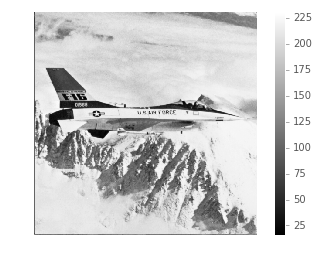

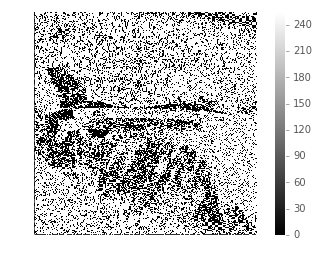

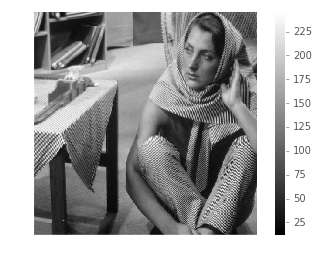

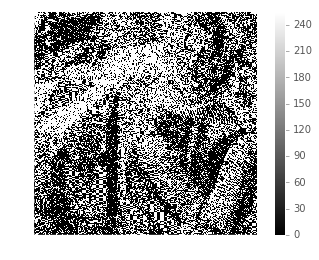

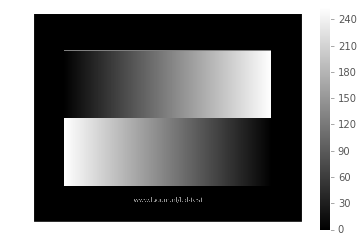

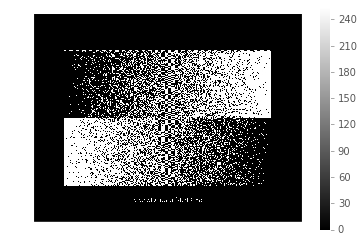

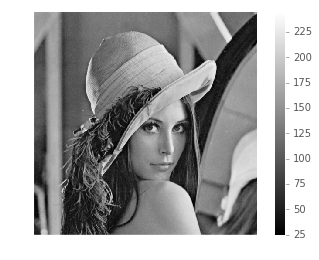

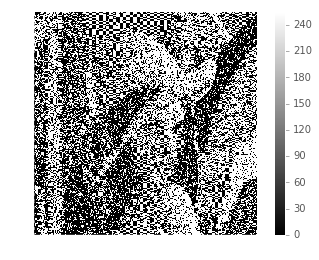

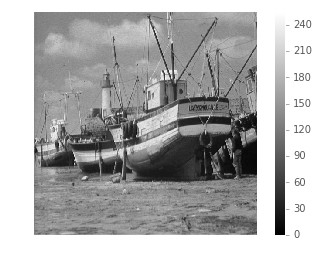

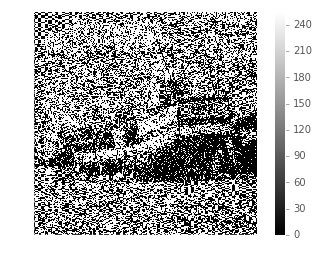

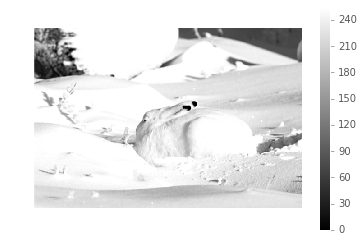

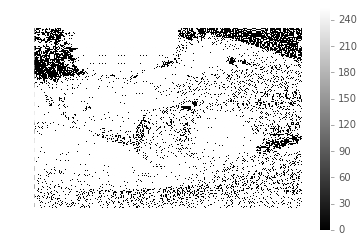

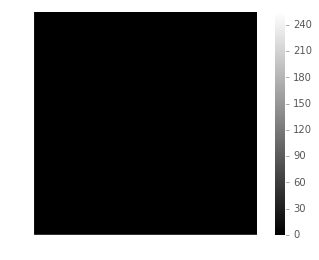

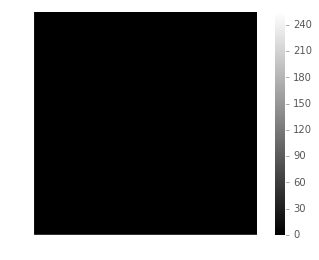

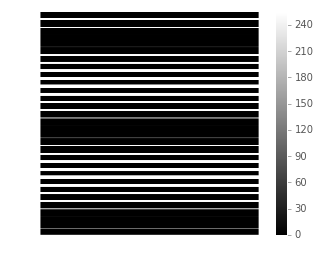

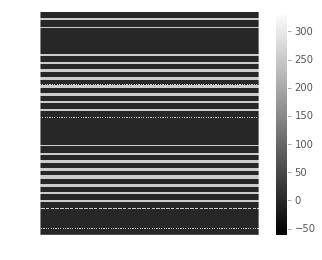

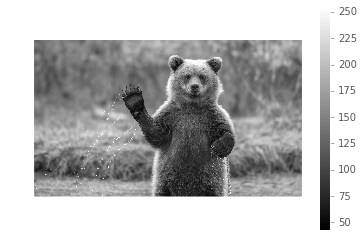

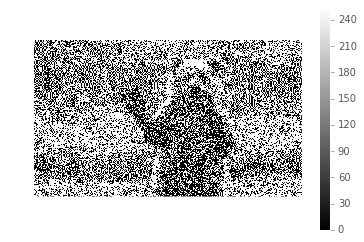

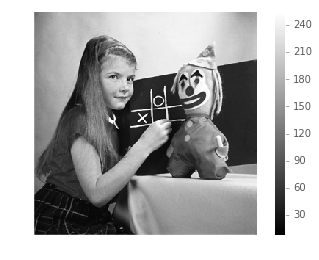

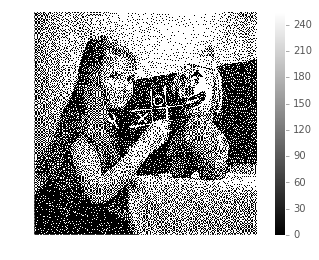

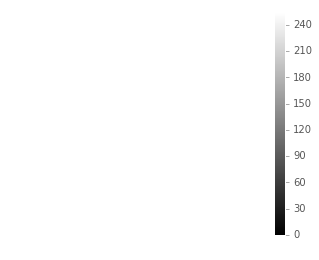

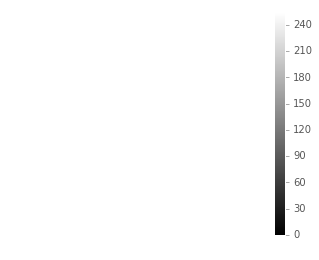

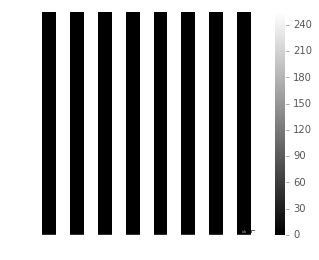

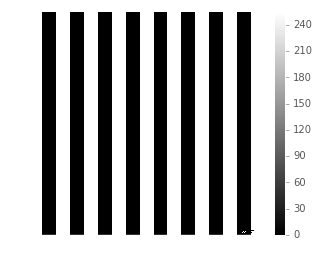

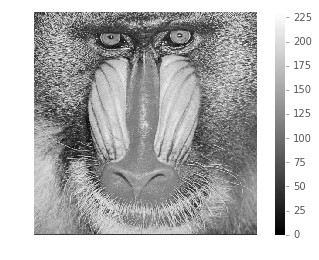

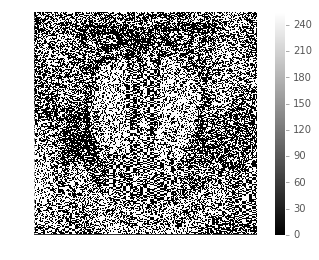

In [5]:
for q, im in enumerate(gray_scale_input):
    im_64b = im.astype(np.int64)
    thresholded_im = im_64b.copy()

    for i in range(thresholded_im.shape[0]):
        if i % 2 == 0:
            for j in range(thresholded_im.shape[1]):
                oldpixel = thresholded_im[i, j]

                if thresholded_im[i, j] < 0.5 * 255:
                    thresholded_im[i, j] = 0
                else:
                    thresholded_im[i, j] = 255

                error = oldpixel - thresholded_im[i, j]

                if j + 1 < thresholded_im.shape[1]:
                    thresholded_im[i,     j + 1] += error * 7 / 16.0
                if i + 1 < thresholded_im.shape[0] and j + 1 >= 0:
                    thresholded_im[i + 1, j - 1] += error * 3 / 16.0
                if i + 1 < thresholded_im.shape[0]:
                    thresholded_im[i + 1, j] += error * 5 / 16.0
                if i + 1 < thresholded_im.shape[0] and j + 1 < thresholded_im.shape[1]:
                    thresholded_im[i + 1, j + 1] += error * 1 / 16.0
        else:
            for j in range(thresholded_im.shape[1] - 1, 0, -1):           
                oldpixel = thresholded_im[i, j]

                if thresholded_im[i, j] < 0.5 * 255:
                    thresholded_im[i, j] = 0
                else:
                    thresholded_im[i, j] = 255

                error = oldpixel - thresholded_im[i, j]

                if j + 1 < thresholded_im.shape[1]:
                    thresholded_im[i,     j - 1] += error * 7 / 16.0
                if i + 1 < thresholded_im.shape[0] and j + 1 < thresholded_im.shape[1]:
                    thresholded_im[i + 1, j + 1] += error * 3 / 16.0
                if i + 1 < thresholded_im.shape[0]:
                    thresholded_im[i + 1, j] += error * 5 / 16.0
                if i + 1 < thresholded_im.shape[0] and j - 1 >= 0:
                    thresholded_im[i + 1, j - 1] += error * 1 / 16.0

    draw_gray(im)
    draw_gray(thresholded_im)
    
    cv2.imwrite('../output_imgs/fs{}.png'.format(q), thresholded_im)

In [15]:
im = cv2.imread('../output_imgs/fs4.png')

In [16]:
im.max()

255

In [17]:
im.min()

0

In [19]:
im

array([[[  0,   0,   0],
        [255, 255, 255],
        [  0,   0,   0],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0]],

       [[188, 188, 188],
        [  0,   0,   0],
        [255, 255, 255],
        ..., 
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [  0,   0,   0],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [  0,   0,   0],
        [255, 255, 255]],

       ..., 
       [[176, 176, 176],
        [  0,   0,   0],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [  0,   0,   0],
        [255, 255, 255]],

       [[  0,   0,   0],
        [255, 255, 255],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 85,  85,  85],
        [255, 255, 255],
        [  0,   0,   0],
        ..., 
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255,